In [1]:
# LAMMPSのインポート
from lammps import lammps, PyLammps

# LAMMPSインスタンスの作成
lmp = lammps()

# LAMMPSスクリプトを入力
SCRIPT_FILE = "sdc_lammps.in"
lmp.file(SCRIPT_FILE)

# 実行終了後のデータ解析（例：エネルギー出力）
energy = lmp.extract_compute("thermo_pe", 0, 0)
print(f"Final Potential Energy: {energy} eV")

# シミュレーション終了後にLAMMPSをクリーンアップ
lmp.close()

LAMMPS (29 Aug 2024 - Update 1)
Lattice spacing in x,y,z = 5.411 5.411 5.411
Created orthogonal box = (0 0 0) to (54.11 54.11 54.11)
  1 by 1 by 1 MPI processor grid
Created 4000 atoms
  using lattice units in orthogonal box = (0 0 0) to (54.11 54.11 54.11)
  create_atoms CPU = 0.008 seconds
Created 4000 atoms
  using lattice units in orthogonal box = (0 0 0) to (54.11 54.11 54.11)
  create_atoms CPU = 0.000 seconds
ERROR on proc 0: cannot open eam potential file CeO2.eam: No such file or directory (src/src/potential_file_reader.cpp:58)
Last command: pair_coeff * * CeO2.eam


Exception: ERROR on proc 0: cannot open eam potential file CeO2.eam: No such file or directory (src/src/potent

In [9]:
from ovito.io import import_file
from ovito.vis import Viewport
from ovito.modifiers import ColorCodingModifier

DUMP_FILE = "dump.ceo2"

pipeline = import_file(DUMP_FILE, columns=[
    "Particle Identifier", "Particle Type", "Position.X", "Position.Y", "Position.Z", 
    "Velocity.X", "Velocity.Y", "Velocity.Z"
])

# 原子の種類ごとに色を設定（例：Ce = 赤, O = 青）
color_table = [
    (1.0, 0.0, 0.0),  # Ce = 赤
    (0.0, 0.0, 1.0)  # O = 青
]

pipeline.modifiers.append(ColorCodingModifier(
    property = 'Particle Type',
    gradient = ColorCodingModifier.Gradient(color_table)
))

pipeline.add_to_scene()

# ビュー設定
viewport = Viewport()
viewport.type = Viewport.Type.Perspective  # 視点の種類
viewport.camera_pos = (80, 80, 50)         # カメラ位置
viewport.camera_dir = (-1, -1, -1)         # カメラの向き
viewport.fov = 45                          # 視野角

viewport.render_anim(
    filename="ceo2_simulation.mp4",    # 出力ファイル名
    size=(800, 800),                   # 解像度
    fps=30,                     # フレームレート
    background=(1, 1, 1),              # 背景色
)

print("動画 'ceo2_simulation.mp4' が生成されました！")

動画 'ceo2_simulation.mp4' が生成されました！


Total wall time: 0:27:19
Total wall time: 0:27:01
Total wall time: 0:24:56
Total wall time: 0:26:51
Total wall time: 0:17:50


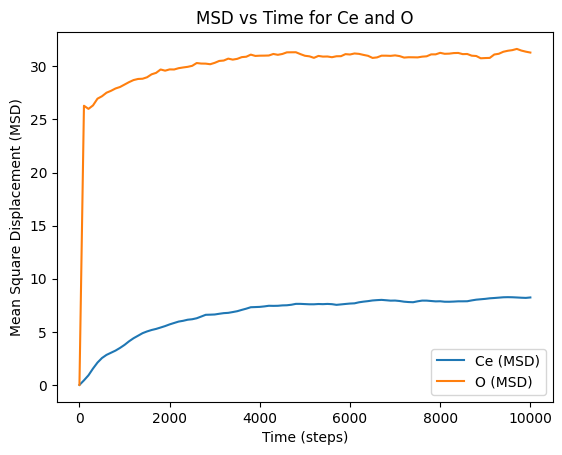

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# CeのMSDデータの読み込み
data_ce = np.loadtxt('msd_ce.dat')
time_steps_ce = data_ce[:, 0]
msd_values_ce = data_ce[:, 1]

# OのMSDデータの読み込み
data_o = np.loadtxt('msd_o.dat')
time_steps_o = data_o[:, 0]
msd_values_o = data_o[:, 1]

# MSDをプロット
plt.plot(time_steps_ce, msd_values_ce, label='Ce (MSD)')
plt.plot(time_steps_o, msd_values_o, label='O (MSD)')
plt.xlabel('Time (steps)')
plt.ylabel('Mean Square Displacement (MSD)')
plt.title('MSD vs Time for Ce and O')
plt.legend()
plt.show()